In [286]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd
import sklearn.metrics
import statsmodels.api as sm


# Lab: Multiple Testing




## Review of Hypothesis Tests

We begin by performing some one-sample  $t$-tests  using the `t.test()` function.
 First we create 100 variables, each consisting of 10 observations. The first 50 variables have mean $0.5$ and variance $1$,
while the others have mean $0$ and variance $1$.

In [236]:
num_obs = 10
num_repl = 100
x = scipy.stats.norm.rvs(loc=0, scale=1, size=num_repl*num_obs, random_state=4343432).reshape(num_obs, num_repl)
x[:,:int(num_repl/2)] = x[:,:int(num_repl/2)] + 0.5

In [237]:
x_mean = x.mean(axis=0)
x_mean
x_mean_input = np.zeros(x_mean.shape)
x_mean_input[:int(num_repl/2)] = 0.5

The `t.test()` function can perform a one-sample or a two-sample $t$-test.
 By default, a  one-sample test is performed. To begin, we test $H_{0}: \mu_1=0$, the null hypothesis that the first variable has mean zero.

In [238]:
#x = pd.read_csv('x.csv') #Just going to grab this one from R so that i get the right numbers.
#x = x.drop(x.columns[0], axis=1).values

Text(0.5, 1.0, 'all data')

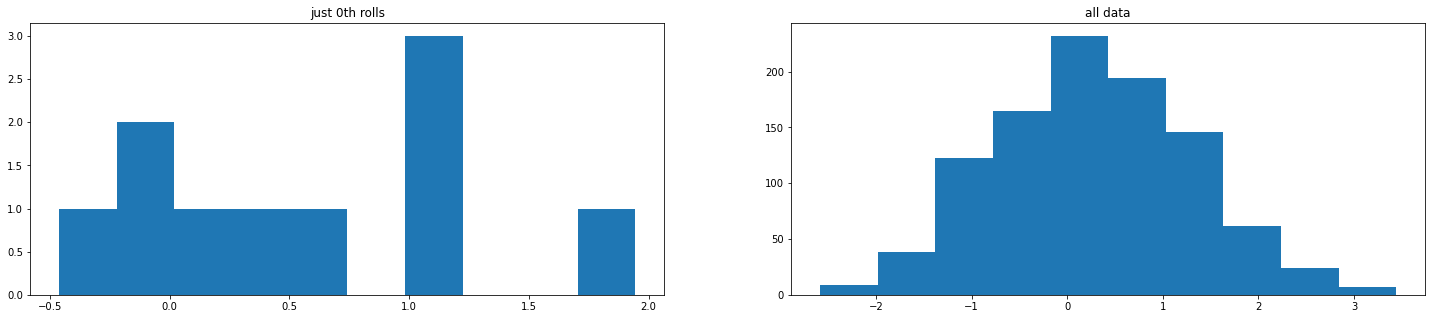

In [239]:
fig, ax = plt.subplots(1, 2, figsize = (25, 5))
ax[0].hist(x[:,0])
ax[0].set_title('just 0th rolls')
ax[1].hist(x.ravel())
ax[1].set_title('all data')

In [240]:
print(scipy.stats.ttest_1samp(x[:,0], 0))# - p value not  < 0.05; so on this particular one we would say that mean not 0

Ttest_1sampResult(statistic=2.4828297683560985, pvalue=0.034829357346318465)


0.5877890834819717


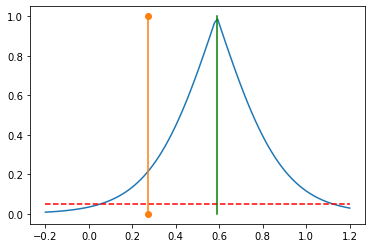

In [241]:
murange = np.linspace(-0.2, 1.2, 100)
print(x[:,0].mean())
plt.plot(murange, scipy.stats.ttest_1samp(x[:,0], murange).pvalue)
plt.plot([-.2, 1.2], [0.05, 0.05], 'r--')
plt.plot([x[:,0].mean(), x[:,0].mean()], [0, 1], 'g-')
plt.plot([x.ravel().mean(), x.ravel().mean()], [0, 1], 'o-')

#hypothesis h0: mu = 0 - null hypothesis
#h1: mu != 0
# p = 0.06; > 0.05; not low enough to reject (if 0.05 or lower, then we would say that the mean is not 0.)
#from chart below; we'd actually only reject the null for values of -0.05 up to ~ 1.2.. so a very wide range.
#probably because 

The $p$-value comes out to $0.067$, which is not quite low enough to reject the null hypothesis at level $\alpha=0.05$.
  In this case, $\mu_1=0.5$, so the null hypothesis is false. Therefore, we have made a Type II error by failing to reject the null hypothesis when
the null hypothesis is false. 

We now test $H_{0j}: \mu_j=0$ for $j=1,\ldots,100$. We compute the 100
 $p$-values, and then construct a vector recording whether the $j$th $p$-value is less than or equal to 0.05, in which case we reject $H_{0j}$,
 or greater than 0.05, in which case we do not reject $H_{0j}$, for $j=1,\ldots,100$.

In [242]:
scipy.stats.ttest_1samp(x[:,0],0)

Ttest_1sampResult(statistic=2.4828297683560985, pvalue=0.034829357346318465)

<BarContainer object of 17 artists>

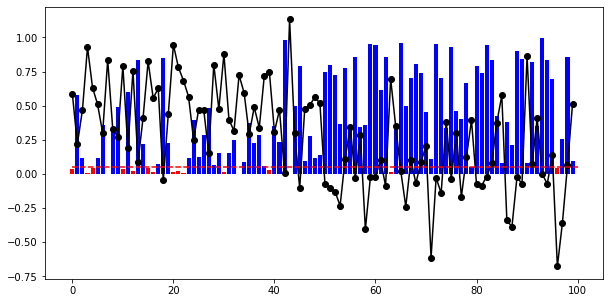

In [243]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(np.arange(x.shape[1]), x.mean(axis=0), 'ko-')
ax.plot([0, 100], [.05, .05], 'r--')
ax.bar(x = np.arange(x.shape[1]), height=scipy.stats.ttest_1samp(x, 0).pvalue, color='b')
xplot, yplot = zip(*[(i,j) for i,j in enumerate(scipy.stats.ttest_1samp(x, 0).pvalue) if j < 0.05])
ax.bar(x = xplot, height=yplot, color='r')

In [244]:
len(yplot)

17

In [245]:
ytrue = (x_mean_input == 0).astype('int')
yttest = (scipy.stats.ttest_1samp(x, 0).pvalue > 0.05).astype('int')
res = sklearn.metrics.confusion_matrix(ytrue, yttest)
res = pd.DataFrame(res, index = ['Sample Mean = 0.5', 'Sample Mean = 0.0'], columns = ['Reject null hyp H0 (mu=0)', ' Do Not Reject H0'])
print(res)
#print('number of correct )

#Test - H0 = 0 - null hypothesis

#Type 1 - Rejecting null hypoth (mu=0) when it is actually true - false positive because we said mu was different from zero (rejected null hypoth), but it was actually zero
#Type 2 - Not rejecting null hypoth when it is actually false; when mu=0.5, but we fail to reject null hypoth (that mu=0)
            #false negative because we should have said mu was not 0, but didn't


                   Reject null hyp H0 (mu=0)   Do Not Reject H0
Sample Mean = 0.5                         15                 35
Sample Mean = 0.0                          2                 48


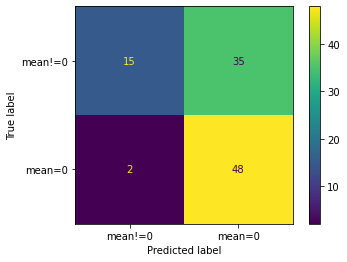

In [246]:
disp_labels = ['mean!=0', 'mean=0']
disp = sklearn.metrics.ConfusionMatrixDisplay(sklearn.metrics.confusion_matrix(ytrue, yttest), display_labels=disp_labels)
disp.plot()


Therefore, at level $\alpha=0.05$, we reject just 10 of the 50 false null hypotheses,
 and we incorrectly reject 3 of the true null hypotheses. Using the notation from Section 13.3, we have $W=40$, $U=47$, $S=10$, and $V=3$.
  Note that the rows and columns of this table are reversed relative to Table 13.2.
 We have set $\alpha=0.05$, which means that we expect to reject around $5\%$ of the true null hypotheses. This is in line with the $2 \times 2$ table
above, which indicates that we rejected $V=3$ of the $50$ true null hypotheses.

In the simulation above, for the false null hypotheses, the ratio of the mean to the standard deviation
 was only $0.5/1 = 0.5$. This amounts to quite a weak signal, and
it resulted in a high number of Type II errors.
If we instead simulate data with a stronger signal, so that  the ratio of the mean to the standard deviation for the false null hypotheses equals $1$,
then we make only $9$ Type II errors.

In [249]:
num_obs = 10
num_repl = 100
x = scipy.stats.norm.rvs(loc=0, scale=1, size=num_repl*num_obs, random_state=4343432).reshape(num_obs, num_repl)
x[:,:int(num_repl/2)] = x[:,:int(num_repl/2)] + 1
x_mean = x.mean(axis=0)
x_mean
x_mean_input = np.zeros(x_mean.shape)
x_mean_input[:int(num_repl/2)] = 1
ytrue = (x_mean_input == 0).astype('int')
yttest = (scipy.stats.ttest_1samp(x, 0).pvalue > 0.05).astype('int')
res = sklearn.metrics.confusion_matrix(ytrue, yttest)
res = pd.DataFrame(res, index = ['Sample Mean = 1.0', 'Sample Mean = 0.0'], columns = ['Reject null hyp H0 (mu=0)', ' Do Not Reject H0'])
res

,Reject null hyp H0 (mu=0),Do Not Reject H0
Sample Mean = 1.0,42,8
Sample Mean = 0.0,2,48


## The Family-Wise Error Rate
Recall from (13.5) that if the null hypothesis is true for each of $m$ independent hypothesis tests, then the
  FWER is equal to $1-(1-\alpha)^m$. We can use this expression to compute the FWER for $m=1,\ldots, 500$ and $\alpha=0.05$, $0.01$, and $0.001$.

Text(0, 0.5, 'family wise ERROR rate')

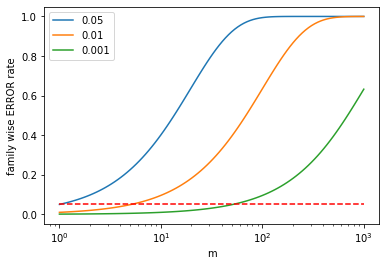

In [260]:
#Family Wise Error Rate
fig, ax = plt.subplots(1, 1)
ms = np.logspace(0, 3, 100)
ax.semilogx(ms, 1 - (1-.05)**ms, label='0.05')
ax.semilogx(ms, 1 - (1-.01)**ms, label='0.01')
ax.semilogx(ms, 1 - (1-.001)**ms, label='0.001')
ax.plot(ms, 0.05*np.ones(ms.shape),'r--')
ax.legend()
ax.set_xlabel('m')
ax.set_ylabel('family wise ERROR rate')

We plot these three vectors in order to
reproduce Figure 13.2. The  red, blue, and green lines correspond to $\alpha=0.05$, $0.01$, and $0.001$, respectively.

 As discussed previously, even for moderate values of $m$ such as $50$, the FWER exceeds $0.05$ unless $\alpha$ is set to a very low value,
  such as $0.001$.
Of course,
 the problem with setting $\alpha$ to such a low value is that we are likely to make a number of Type II errors: in other words, our power is very low.


We now conduct a one-sample $t$-test for each of the first five managers in the `Fund` dataset,
  in order to test the null hypothesis that the $j$th fund manager's mean return equals zero,
$H_{0j}: \mu_j=0$.

[0.00620236 0.91827115 0.01160098 0.6005396  0.75578151]


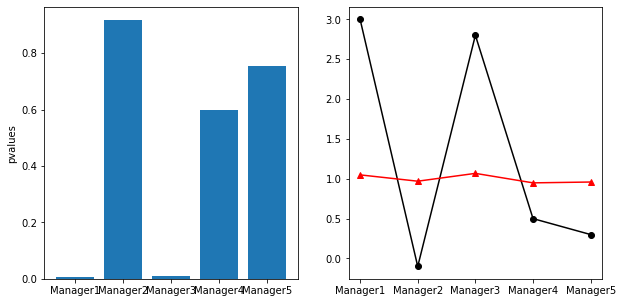

In [364]:
df = pd.read_csv('/home/zacharygibbs/documents/datascience/ISLR/book_content/data/Fund.csv')
df = df.drop(df.columns[0], axis=1).iloc[:, 0:5]
pvals = scipy.stats.ttest_1samp(df, 0).pvalue
print(pvals)
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].bar(x=df.columns, height=pvals)
ax[0].set_ylabel('pvalues')
ax[1].plot(df.columns,df.mean(axis=0), 'ko-')
ax[1].plot(df.columns, df.std(axis=0) / np.sqrt(df.count(axis=0)), 'r^-')

The  $p$-values are low for Managers One and Three, and high for the other three managers.
 However, we cannot simply reject $H_{01}$ and $H_{03}$, since this would fail to account for the multiple testing that we
have performed. Instead, we will
 conduct Bonferroni's method and Holm's method
to control the FWER.


To do this, we use the `p.adjust()` function. Given the $p$-values, the
 function outputs , which
 can be thought of as a new set of $p$-values that have been corrected for  multiple testing. If the adjusted $p$-value for a given hypothesis is
less than or equal to $\alpha$, then that hypothesis can be rejected while maintaining a FWER
of no more than $\alpha$.
In other words, the adjusted $p$-values resulting from the `p.adjust()` function can simply be compared to the desired FWER in order to determine
whether or not to reject
each hypothesis.

For example, in the case of Bonferroni's
method, the raw $p$-values are multiplied by the total number of hypotheses, $m$, in order to obtain the adjusted $p$-values. (However,
adjusted $p$-values are not allowed to exceed $1$.)

In [365]:
#manager 1 hypothesis rejected (mu != 0); manager 3 not so much after adjustment (failed to reject mu=0 null hypothesis)
pvals * len(df.columns)

array([0.03101178, 4.59135576, 0.05800491, 3.002698  , 3.77890754])

Therefore, using Bonferroni's method, we are able to reject the null hypothesis only for Manager
One while controlling the FWER at $0.05$.

By contrast, using Holm's method, the adjusted $p$-values indicate that we can  
 reject the null hypotheses for Managers One and Three at a FWER
of $0.05$.

In [398]:
?sm.stats.multipletests

In [401]:
methds = ('bonferroni', 'holm', 'fdr_bh')
for methd in methds:
    print('------')
    print(methd)
    print(sm.stats.multipletests(pvals, method=methd, alpha = .05))

------
bonferroni
(array([ True, False, False, False, False]), array([0.03101178, 1.        , 0.05800491, 1.        , 1.        ]), 0.010206218313011495, 0.01)
------
holm
(array([ True, False,  True, False, False]), array([0.03101178, 1.        , 0.04640393, 1.        , 1.        ]), 0.010206218313011495, 0.01)
------
fdr_bh
(array([ True, False,  True, False, False]), array([0.02900246, 0.91827115, 0.02900246, 0.91827115, 0.91827115]), 0.010206218313011495, 0.01)


## As discussed previously, Manager One seems to perform particularly well, whereas Manager Two has poor performance.

Is there evidence of a meaningful difference in performance between these two managers? Performing a paired $t$-test 
using the `t.test()` function results in a $p$-value of $0.038$, suggesting a statistically significant difference.

In [368]:
scipy.stats.ttest_ind(df.iloc[:,0], df.iloc[:, 1]) #null hypothesis - H0 - mu1 = mu3

Ttest_indResult(statistic=2.170434130243413, pvalue=0.03238986961450353)

In [369]:
scipy.stats.ttest_rel(df.iloc[:,0], df.iloc[:, 1]) #this must be the 'paired = true' option

Ttest_relResult(statistic=2.1280149481489823, pvalue=0.038391072368079586)

In [370]:
#just trying a similar test w/ statsmodels
sm.stats.ttest_ind(df.iloc[:,0], df.iloc[:, 1])
#?sm.stats.ttest_ind

(2.170434130243413, 0.03238986961450353, 98.0)

In [371]:
print(df.iloc[:,0].mean())
print(df.iloc[:,0].std()/np.sqrt(df.iloc[:,0].count()))
print(df.iloc[:,1].mean())
print(df.iloc[:,1].std()/np.sqrt(df.iloc[:,1].count()))

2.9999999999999987
1.0488088481701525
-0.09999999999999928
0.9695359714832659


However, we decided to perform this test only after examining the data and noting that Managers One and Two had the highest and lowest mean performances.
 In a sense, this means that we have implicitly performed ${5 \choose 2} = 5(5-1)/2=10$ hypothesis tests, rather than just one, as discussed
in Section 13.3.2.
 Hence, we use the `TukeyHSD()` function to apply  Tukey's method  in order to adjust for multiple testing.
This function takes as input the output of an  regression model,
which is essentially just a linear regression in which all of the predictors are qualitative.
In this case, the response consists of the monthly excess returns achieved by each manager,
 and the predictor indicates the manager to which each return corresponds.

In [372]:
#https://www.statology.org/tukey-test-python/
scipy.stats.f_oneway(df.iloc[:,0],df.iloc[:,1], df.iloc[:,2], df.iloc[:,3], df.iloc[:,4], axis=0)
#null hypothesis - means are the same was not rejected (so the means may be the same)

F_onewayResult(statistic=2.184999999999998, pvalue=0.07125702549875071)

In [378]:
df2 = df.melt()

In [382]:
#create DataFrame to hold data
#df = pd.DataFrame({'score': [85, 86, 88, 75, 78, 94, 98, 79, 71, 80,
#                             91, 92, 93, 90, 97, 94, 82, 88, 95, 96,
#                             79, 78, 88, 94, 92, 85, 83, 85, 82, 81],
#                   'group': np.repeat(['a', 'b', 'c'], repeats=10)}) 

# perform Tukey's test


tukey = sm.stats.multicomp.pairwise_tukeyhsd(endog=df2['value'],
                          groups=df2['variable'],
                          alpha=0.05)

#display results
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
Manager1 Manager2     -3.1 0.1861 -6.9866 0.7866  False
Manager1 Manager3     -0.2    0.9 -4.0866 3.6866  False
Manager1 Manager4     -2.5 0.3962 -6.3866 1.3866  False
Manager1 Manager5     -2.7 0.3152 -6.5866 1.1866  False
Manager2 Manager3      2.9 0.2452 -0.9866 6.7866  False
Manager2 Manager4      0.6    0.9 -3.2866 4.4866  False
Manager2 Manager5      0.4    0.9 -3.4866 4.2866  False
Manager3 Manager4     -2.3 0.4825 -6.1866 1.5866  False
Manager3 Manager5     -2.5 0.3962 -6.3866 1.3866  False
Manager4 Manager5     -0.2    0.9 -4.0866 3.6866  False
-------------------------------------------------------


The `TukeyHSD()` function provides confidence intervals for the difference between each pair of managers (`lwr` and `upr`),
as well as a $p$-value. All of these quantities
  have been adjusted for multiple testing. Notice that the $p$-value for the difference between Managers One and Two
  has increased from $0.038$ to $0.186$, so there is no longer  clear evidence of a difference between the managers' performances.
We can plot the confidence intervals for the pairwise comparisons using the `plot()` function.

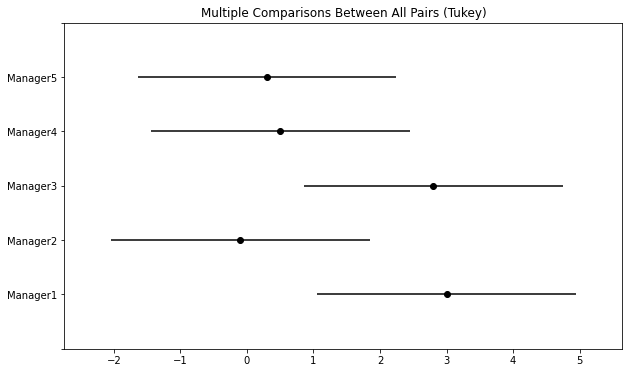

In [395]:
ax = tukey.plot_simultaneous()

## The False Discovery Rate

Now we perform hypothesis tests for all 2,000 fund managers in the `Fund` dataset. We perform a one-sample $t$-test of
$H_{0j}: \mu_j=0$, which states that the $j$th fund manager's mean return is zero.

In [466]:
df = pd.read_csv('/home/zacharygibbs/documents/datascience/ISLR/book_content/data/Fund.csv')
df = df.drop(df.columns[0], axis=1)

(array([ 25.,  60., 115., 134., 173., 228., 271., 304., 318., 372.]),
 array([0.03132619, 0.16958486, 0.30784352, 0.44610219, 0.58436086,
        0.72261952, 0.86087819, 0.99913685, 1.13739552, 1.27565418,
        1.41391285]),
 <BarContainer object of 10 artists>)

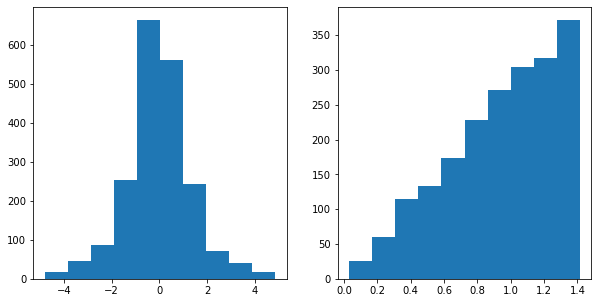

In [413]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].hist(df.mean(axis=0))
ax[1].hist(df.std(axis=0)/np.sqrt(df.count(axis=0)))

289


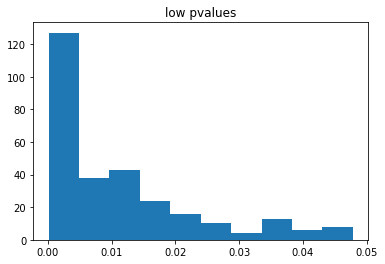

In [469]:
pvals = scipy.stats.ttest_1samp(df, 0).pvalue
plt.hist([i for i in pvals if i < 0.05])
plt.title('low pvalues')
print(len([i for i in pvals if i < 0.05]))
#at the end of the day, there are a lot..

In [458]:
df_pvals = pd.DataFrame({'raw': pvals}, index=df.columns)
methds = ('bonferroni', 'holm', 'fdr_bh')
for methd in methds:
    df_pvals[methd] = sm.stats.multipletests(pvals, method=methd, alpha = .10)[1]

In [479]:
for col in df_pvals.columns:
    print(col, len(df_pvals[df_pvals[col] < 0.1].index))

raw 392
bonferroni 0
holm 0
fdr_bh 146


(array([128.,   0.,   3.,   1.,   4.,   0.,   3.,   0.,   4.,   3.]),
 array([0.07513802, 0.07748871, 0.0798394 , 0.08219009, 0.08454078,
        0.08689147, 0.08924216, 0.09159285, 0.09394354, 0.09629423,
        0.09864492]),
 <BarContainer object of 10 artists>)

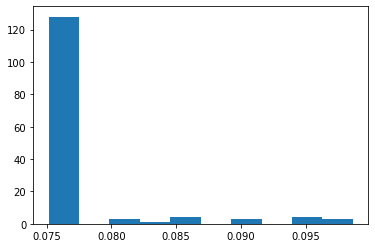

In [480]:
plt.hist([i for i in df_pvals['fdr_bh'] if i<0.1])

There are far too many managers to consider trying to control the FWER.
Instead, we focus on controlling the FDR: that is, the expected fraction of rejected null hypotheses that are actually false positives.
The `p.adjust()` function can be used to carry out the Benjamini-Hochberg procedure.

The q-values output by the Benjamini-Hochberg procedure can be interpreted as the smallest FDR threshold at which we
would reject a particular null hypothesis. For instance, a $q$-value of $0.1$ indicates that we can reject the corresponding null hypothesis at
an FDR of $10\%$ or greater, but that we cannot reject the null hypothesis at an FDR below $10\%$.

If we control the FDR at $10\%$, then for how many of the fund managers can we reject $H_{0j}: \mu_j=0$?

We find that 146 of the 2,000 fund managers have a $q$-value below 0.1; therefore, we are able to conclude that 146 of the fund managers
beat the market at an FDR of $10\%$.  Only about 15 ($10\%$ of 146) of these fund managers are likely to be false discoveries.
By contrast,
if we had instead used Bonferroni's method to control the FWER at level  $\alpha=0.1$, then we would have failed to reject any null hypotheses!

In [ ]:
sum(fund.pvalues <= (0.1 / 2000))

Figure 13.6 displays the ordered $p$-values, $p_{(1)} \leq p_{(2)} \leq \cdots \leq p_{(2000)}$,
for the `Fund` dataset, as well as the
threshold for rejection by the Benjamini-Hochberg procedure.
Recall that the Benjamini-Hochberg procedure search\-es for the largest $p$-value such that $p_{(j)}<qj/m$, and rejects all hypotheses
for which the $p$-value is  less than or equal to $p_{(j)}$. In the code below, we implement
 the Benjamini-Hochberg procedure ourselves, in order to illustrate how it works. We
first order the $p$-values. We then  identify
all $p$-values that satisfy $p_{(j)}<qj/m$ (`wh.ps`).
Finally, `wh` indexes all  $p$-values that are less than or equal to the largest $p$-value in `wh.ps`. Therefore, `wh`
indexes the $p$-values rejected by the Benjamini-Hochberg procedure.

In [ ]:
ps <- sort(fund.pvalues)
m <- length(fund.pvalues)
q <- 0.1
wh.ps <- which(ps < q * (1:m) / m)
if (length(wh.ps) >0) {
  wh <- 1:max(wh.ps)
 } else {
  wh <- numeric(0)
 }

We now reproduce the middle panel of Figure 13.6.

In [ ]:
plot(ps, log = "xy", ylim = c(4e-6, 1), ylab = "P-Value",
    xlab = "Index", main = "")
points(wh, ps[wh], col = 4)
abline(a = 0, b = (q / m), col = 2, untf = TRUE)
abline(h = 0.1 / 2000, col = 3)

## A Re-Sampling Approach
Here, we implement the re-sampling approach to hypothesis testing using the `Khan` dataset, which we investigated in Section 13.5.
 First, we merge the training and testing data, which results in observations on $83$ patients for $2{,}308$ genes.

In [ ]:
attach(Khan)
x <- rbind(xtrain, xtest)
y <- c(as.numeric(ytrain), as.numeric(ytest))
dim(x)
table(y)

There are four classes of cancer. For each gene, we compare the mean expression in the second class (rhabdomyosarcoma)
 to the mean expression in the fourth class (Burkitt's lymphoma).
  Performing a standard two-sample $t$-test on the $11$th gene produces a test-statistic of $-2.09$
and an associated $p$-value of $0.0412$, suggesting modest evidence of a difference in mean expression levels between the two cancer types.

In [ ]:
x <- as.matrix(x)
x1 <- x[which(y == 2), ]
x2 <- x[which(y == 4), ]
n1 <- nrow(x1)
n2 <- nrow(x2)
t.out <- t.test(x1[, 11], x2[, 11], var.equal = TRUE)
TT <- t.out$statistic
TT
t.out$p.value

However, this $p$-value relies on the assumption that under the null hypothesis of no difference between the two groups, the
 test statistic follows a $t$-distribution with $29+25-2=52$ degrees of freedom.
Instead of using this theoretical null distribution,
 we can randomly split the 54 patients into two groups of 29 and 25, and compute a new test statistic.
Under the null hypothesis of no difference between the groups, this new test statistic should have the same distribution as our original one.
Repeating this process 10,000 times allows us to approximate the null distribution of the test statistic.
 We compute the fraction of the time that our observed test statistic exceeds the test statistics obtained via re-sampling.

In [ ]:
set.seed(1)
B <- 10000
Tbs <- rep(NA, B)
for (b in 1:B) {
   dat <- sample(c(x1[, 11], x2[, 11]))
   Tbs[b] <- t.test(dat[1:n1], dat[(n1 + 1):(n1 + n2)],
        var.equal = TRUE
      )$statistic
}
mean((abs(Tbs) >= abs(TT)))

This fraction, $0.0416$, is our re-sampling-based $p$-value. It is almost identical to the $p$-value of $0.0412$ obtained using the theoretical null distribution.

We can plot  a histogram of the re-sampling-based test statistics in order to reproduce Figure 13.7.

In [ ]:
hist(Tbs, breaks = 100, xlim = c(-4.2, 4.2), main = "",
    xlab = "Null Distribution of Test Statistic", col = 7)
lines(seq(-4.2, 4.2, len = 1000),
    dt(seq(-4.2, 4.2, len = 1000),
      df = (n1 + n2 - 2)
    ) * 1000, col = 2, lwd = 3)
abline(v = TT, col = 4, lwd = 2)
text(TT + 0.5, 350, paste("T = ", round(TT, 4), sep = ""),
    col = 4)

The re-sampling-based null distribution is almost identical to the theoretical null distribution, which is displayed in red.

Finally, we implement the plug-in re-sampling FDR approach outlined in Algorithm 13.4. Depending on the speed of your computer, calculating the FDR for all 2,308 genes in the `Khan` dataset may take a while.
Hence, we will illustrate the approach on a random subset of 100 genes.
For each  gene, we first compute the observed test statistic,
and then produce $10{,}000$ re-sampled test statistics. This may take a few minutes to run.  If you are in a rush,
then you could set `B` equal to a smaller
value (e.g. `B = 500`).

In [ ]:
m <- 100
B<-1000
set.seed(1)
index <- sample(ncol(x1), m)
Ts <- rep(NA, m)
Ts.star <- matrix(NA, ncol = m, nrow = B)
for (j in 1:m) {
  k <- index[j]
  Ts[j] <- t.test(x1[, k], x2[, k],
        var.equal = TRUE
      )$statistic
  for (b in 1:B) {
    dat <- sample(c(x1[, k], x2[, k]))
    Ts.star[b, j] <- t.test(dat[1:n1],
         dat[(n1 + 1):(n1 + n2)], var.equal = TRUE
       )$statistic
  }
}

Next, we compute the number of rejected null hypotheses $R$, the estimated number of false positives $\widehat{V}$,
 and the estimated FDR, for a range of threshold values
  $c$ in Algorithm 13.4. The threshold values are chosen using the absolute values of the
  test statistics from the $100$ genes.

In [ ]:
cs <- sort(abs(Ts))
FDRs <- Rs <- Vs <- rep(NA, m)
for (j in 1:m) {
  R <- sum(abs(Ts) >= cs[j])
  V <- sum(abs(Ts.star) >= cs[j]) / B
  Rs[j] <- R
  Vs[j] <- V
  FDRs[j] <- V / R
}

Now, for any given FDR, we can find the genes that will be
rejected. For example, with the FDR controlled at 0.1,
 we reject 15 of the 100 null hypotheses. On average, we would expect about one or two of these genes (i.e. $10\%$ of 15) to be false discoveries.
At an FDR of $0.2$, we can reject the null hypothesis for $28$ genes, of which we expect around six to be false discoveries.
The variable `index` is needed here since we restricted our analysis to just $100$ randomly-selected genes.

In [ ]:
max(Rs[FDRs <= .1])
sort(index[abs(Ts) >= min(cs[FDRs < .1])])
max(Rs[FDRs <= .2])
sort(index[abs(Ts) >= min(cs[FDRs < .2])])

The next line  generates Figure 13.11, which is similar to Figure 13.9,
except that it is based on only  a subset of the genes.

In [ ]:
plot(Rs, FDRs, xlab = "Number of Rejections", type = "l",
    ylab = "False Discovery Rate", col = 4, lwd = 3)

As noted in the chapter, much more efficient implementations of the re-sampling approach to FDR calculation are available, using
e.g. the `samr` package in `R`.


